<a href="https://colab.research.google.com/github/AdamSimion/NLP/blob/main/NLP_BEADAND%C3%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

News Classifier Notebook

This notebook attempts to categorize and visualize news based on their content

Installations and Imports



In [1]:
!pip install nltk

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from collections import Counter
import re
import imageio

Győződjünk meg róla, hogy a szükséges NLTK erőforrások letöltve vannak

In [3]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Data

Dataset [News Dataset](https://www.kaggle.com/datasets/setseries/news-category-dataset)

**Dataset** containing categorized news articles

1. ADAT BETÖLTÉSE

In [9]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/NewsCategorizer.csv'

try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except pd.errors.EmptyDataError:
    print(f"Error: The file at {file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error: Unable to parse the file at {file_path}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully.


In [10]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NewsCategorizer.csv")
data

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods
...,...,...,...,...,...
49995,SPORTS,This Baseball Team Learned There's A Wrong Way...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night
49996,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs
49997,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie
49998,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...,https://www.huffingtonpost.comhttp://extras.de...,They believe CBD could be an alternative to po...,NaN


Csak a 'headline' és 'category' oszlopokat tartjuk meg

In [11]:
data = data[['headline', 'category']]
data = data.dropna(subset=['headline'])  # Üres címek eltávolítása
data

,headline,category
0,143 Miles in 35 Days: Lessons Learned,WELLNESS
1,Talking to Yourself: Crazy or Crazy Helpful?,WELLNESS
2,Crenezumab: Trial Will Gauge Whether Alzheimer...,WELLNESS
3,"Oh, What a Difference She Made",WELLNESS
4,Green Superfoods,WELLNESS
...,...,...
49995,This Baseball Team Learned There's A Wrong Way...,SPORTS
49996,Some Young Spurs Fan Dabbed 38 Times In A Sing...,SPORTS
49997,Rasheed Wallace Ejected From Knicks-Suns Game ...,SPORTS
49998,Why Jake Plummer And Other NFL Players Are Pus...,SPORTS


2. ELŐFELDOLGOZÁS


*   Text lowercasing
*   Special character removal
*   Tokenization
*   Stop word removing
*   Token joining





In [12]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

  #Text lowercasing
    text = text.lower()

  #Special character removing
    text = re.sub(r'[^a-z\s]', '', text)

  #Tokenization
    tokens = word_tokenize(text)

  #Stop word removing
    tokens = [word for word in tokens if word not in stop_words]

  #Token joining
    return ' '.join(tokens)

In [13]:
data['cleaned_headline'] = data['headline'].apply(lambda x: preprocess_text(str(x)))
data

,headline,category,cleaned_headline
0,143 Miles in 35 Days: Lessons Learned,WELLNESS,miles days lessons learned
1,Talking to Yourself: Crazy or Crazy Helpful?,WELLNESS,talking crazy crazy helpful
2,Crenezumab: Trial Will Gauge Whether Alzheimer...,WELLNESS,crenezumab trial gauge whether alzheimers drug...
3,"Oh, What a Difference She Made",WELLNESS,oh difference made
4,Green Superfoods,WELLNESS,green superfoods
...,...,...,...
49995,This Baseball Team Learned There's A Wrong Way...,SPORTS,baseball team learned theres wrong way celebra...
49996,Some Young Spurs Fan Dabbed 38 Times In A Sing...,SPORTS,young spurs fan dabbed times single playoff game
49997,Rasheed Wallace Ejected From Knicks-Suns Game ...,SPORTS,rasheed wallace ejected knickssuns game yellin...
49998,Why Jake Plummer And Other NFL Players Are Pus...,SPORTS,jake plummer nfl players pushing research cann...


3. Szentimentelemzés

---

# Egyszerű megközelítés: Használjunk egy előképzett szentimentelemző modellt / lexikont

>  Pl. VADER (Valence Aware Dictionary and sEntiment Reasoner): kifejezetten alkalmas hírek elemzéséreAdd


  





In [15]:
sia = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [16]:
data['sentiment'] = data['cleaned_headline'].apply(analyze_sentiment)
data

,headline,category,cleaned_headline,sentiment
0,143 Miles in 35 Days: Lessons Learned,WELLNESS,miles days lessons learned,Neutral
1,Talking to Yourself: Crazy or Crazy Helpful?,WELLNESS,talking crazy crazy helpful,Negative
2,Crenezumab: Trial Will Gauge Whether Alzheimer...,WELLNESS,crenezumab trial gauge whether alzheimers drug...,Neutral
3,"Oh, What a Difference She Made",WELLNESS,oh difference made,Neutral
4,Green Superfoods,WELLNESS,green superfoods,Neutral
...,...,...,...,...
49995,This Baseball Team Learned There's A Wrong Way...,SPORTS,baseball team learned theres wrong way celebra...,Positive
49996,Some Young Spurs Fan Dabbed 38 Times In A Sing...,SPORTS,young spurs fan dabbed times single playoff game,Positive
49997,Rasheed Wallace Ejected From Knicks-Suns Game ...,SPORTS,rasheed wallace ejected knickssuns game yellin...,Neutral
49998,Why Jake Plummer And Other NFL Players Are Pus...,SPORTS,jake plummer nfl players pushing research cann...,Neutral


5. EREDMÉNYEK VIZUALIZÁLÁSA
# Szentimentek eloszlása

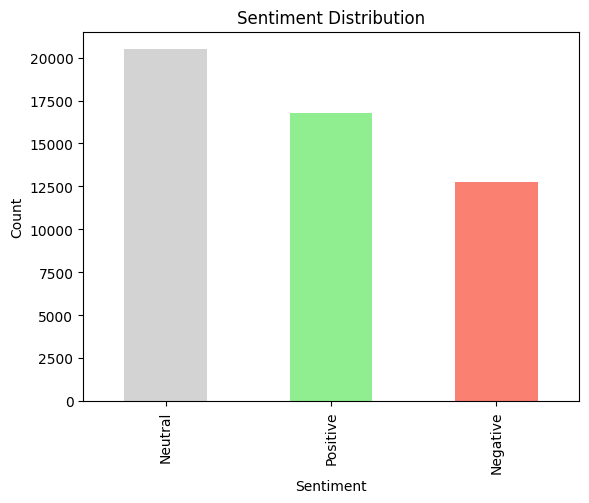

In [17]:
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['lightgray', 'lightgreen', 'salmon'], title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Téma szerinti szentiment eloszlás

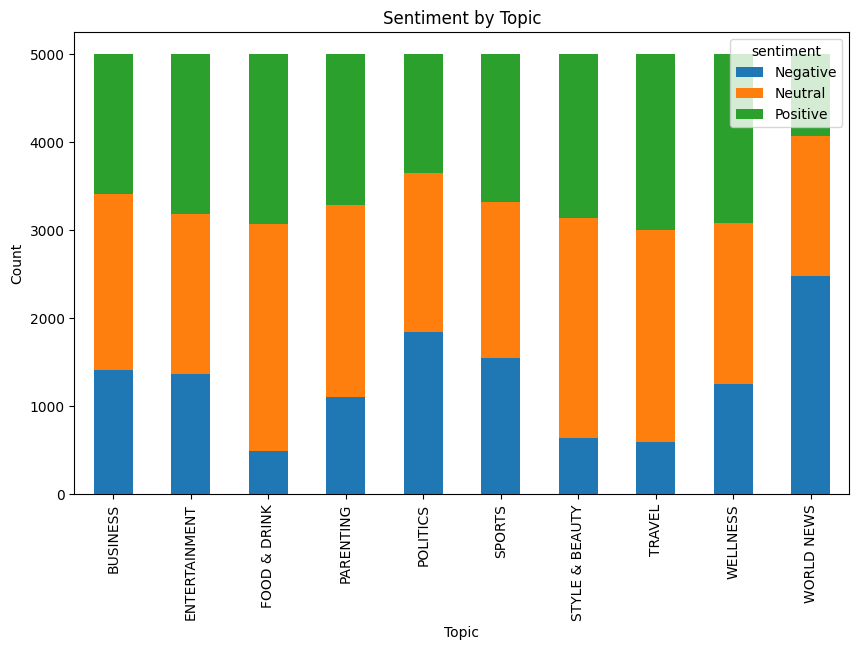

In [18]:
topic_sentiment = data.groupby(['category', 'sentiment']).size().unstack(fill_value=0)
topic_sentiment.plot(kind='bar', stacked=True, title='Sentiment by Topic', figsize=(10, 6))
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

# Kategóriánként százalékosan melyik mennyire pozitiv/negativ/semleges

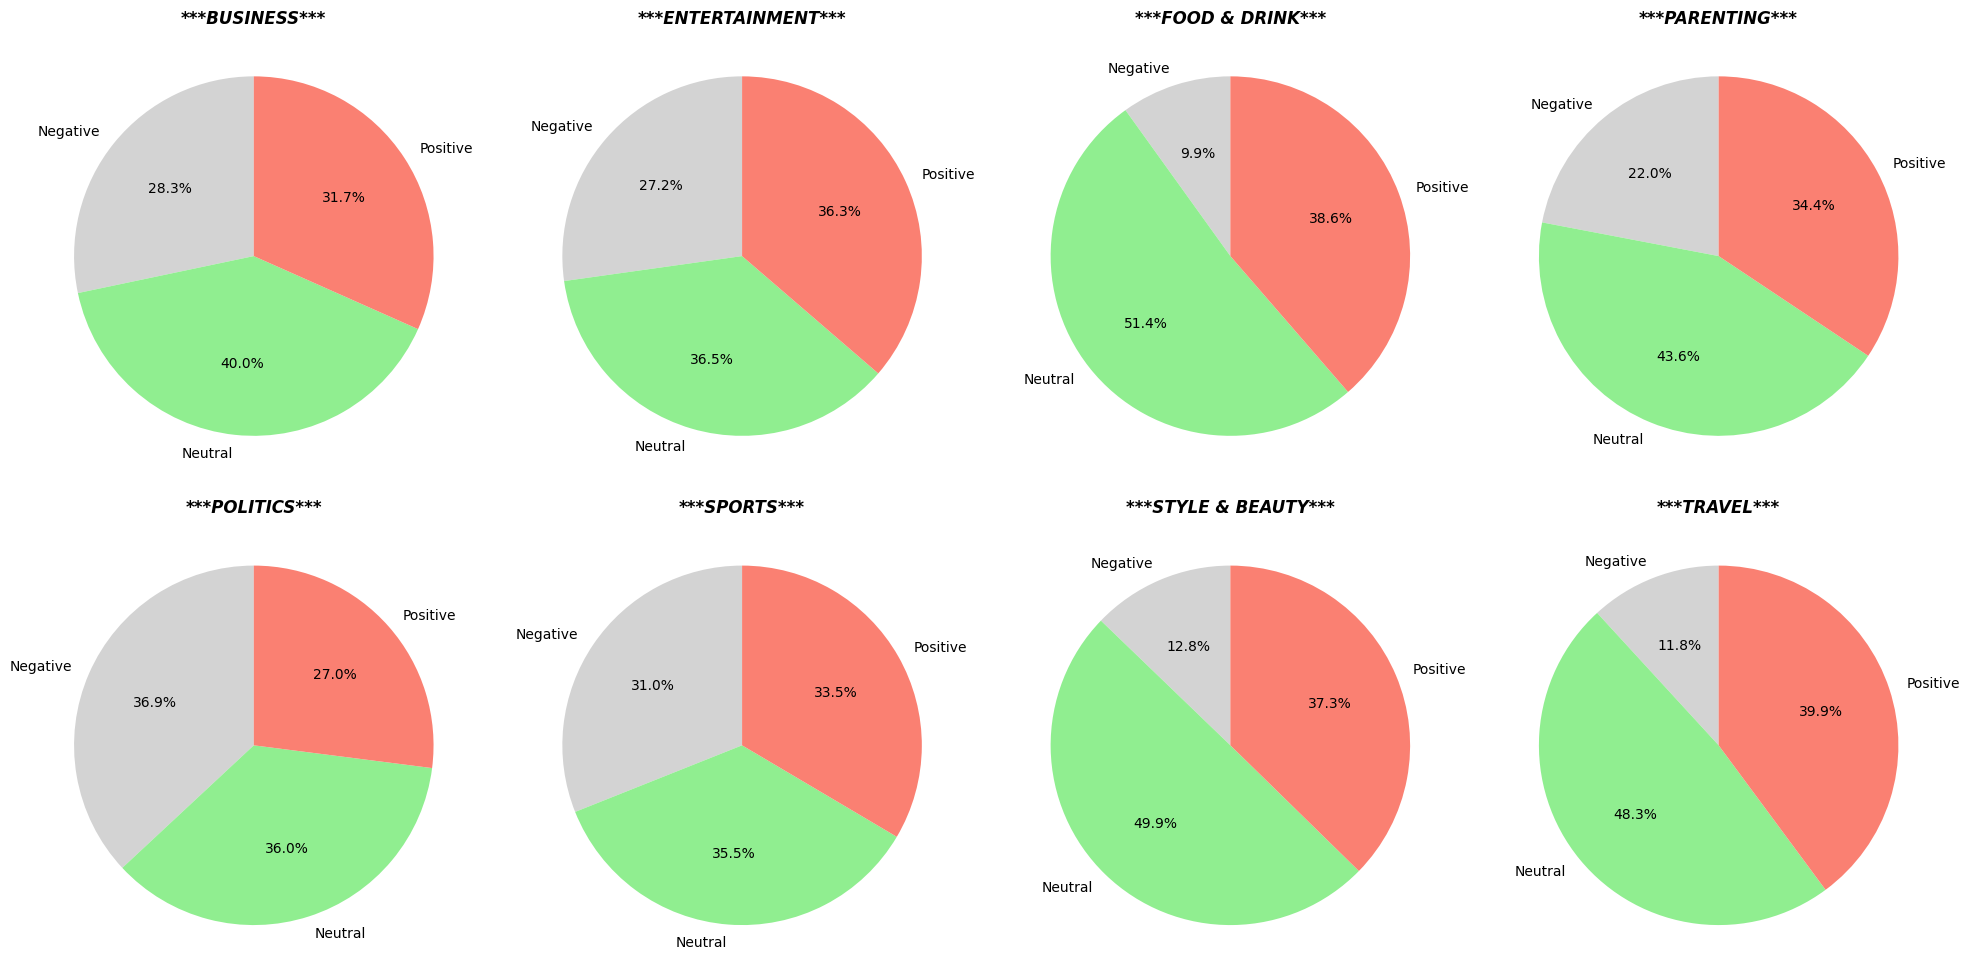

In [51]:
topic_sentiment_percentage = topic_sentiment.div(topic_sentiment.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

colors = ['lightgray', 'lightgreen', 'salmon']

for i, (topic, row) in enumerate(topic_sentiment_percentage.iterrows()):
    if i < len(axes):
        ax = axes[i]
        ax.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90, colors=colors)
        ax.set_title(f"***{topic}***", fontstyle='italic', fontweight='bold')

for i in range(len(topic_sentiment_percentage), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Kategóriánként mely szentiment a legdominánsabb

<ipython-input-27-a65a22def9eb>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filtered_df = pd.concat([filtered_df, pd.DataFrame({'category': [category], 'sentiment': [sentiment], 'percentage': [percentage]})], ignore_index = True)
<ipython-input-27-a65a22def9eb>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(filtered_df['category'], rotation=45, ha='right')


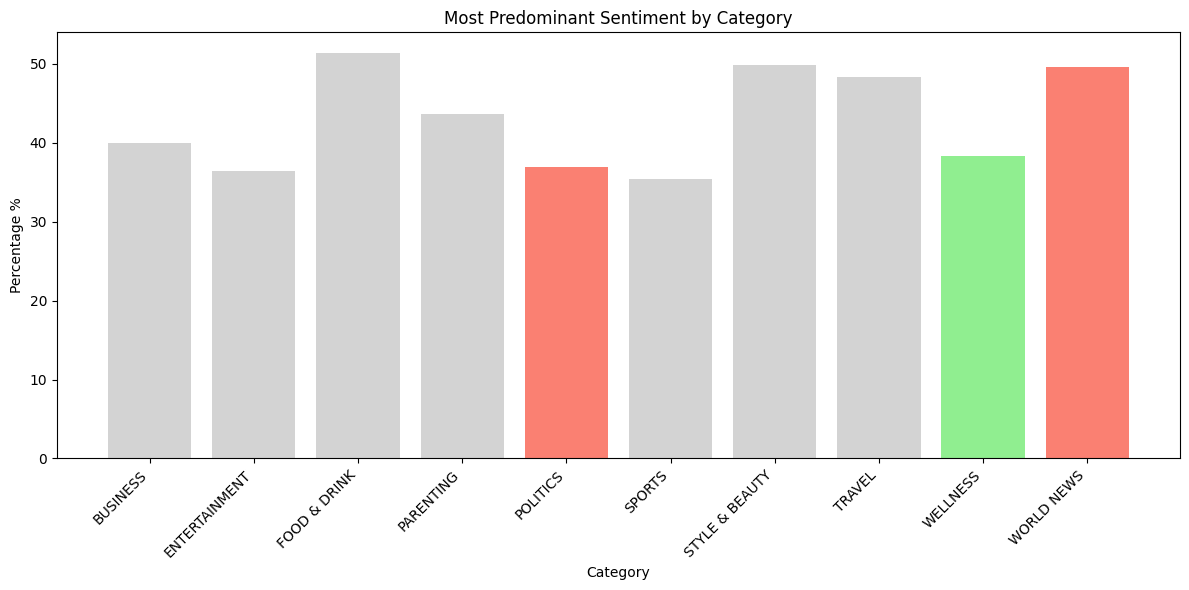

In [27]:
def most_predominant_sentiment(df):
    topic_sentiment = df.groupby(['category', 'sentiment']).size().unstack(fill_value=0)
    most_predominant = topic_sentiment.idxmax(axis=1)
    return most_predominant

most_predominant = most_predominant_sentiment(data)

topic_sentiment_percentage = data.groupby(['category', 'sentiment']).size().unstack(fill_value=0)
topic_sentiment_percentage = topic_sentiment_percentage.div(topic_sentiment_percentage.sum(axis=1), axis=0) * 100

category_order = topic_sentiment_percentage.index

filtered_df = pd.DataFrame(columns=['category','sentiment', 'percentage'])

for category in category_order:
  sentiment = most_predominant[category]
  percentage = topic_sentiment_percentage.loc[category, sentiment]
  filtered_df = pd.concat([filtered_df, pd.DataFrame({'category': [category], 'sentiment': [sentiment], 'percentage': [percentage]})], ignore_index = True)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(filtered_df['category'], filtered_df['percentage'], color=['lightgray' if s == 'Neutral' else 'lightgreen' if s == 'Positive' else 'salmon' for s in filtered_df['sentiment']])
ax.set_xticklabels(filtered_df['category'], rotation=45, ha='right')
ax.set_ylabel('Percentage %')
ax.set_xlabel('Category')
ax.set_title('Most Predominant Sentiment by Category')

plt.tight_layout()
plt.show()

6. Mentés feldolgozott adatokkal


In [ ]:
# data.to_csv("processed_news.csv", index=False)

# Köszönet a figyelemért  ✌

<ipython-input-50-23d495201e0d>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('thankyou_attention.png')


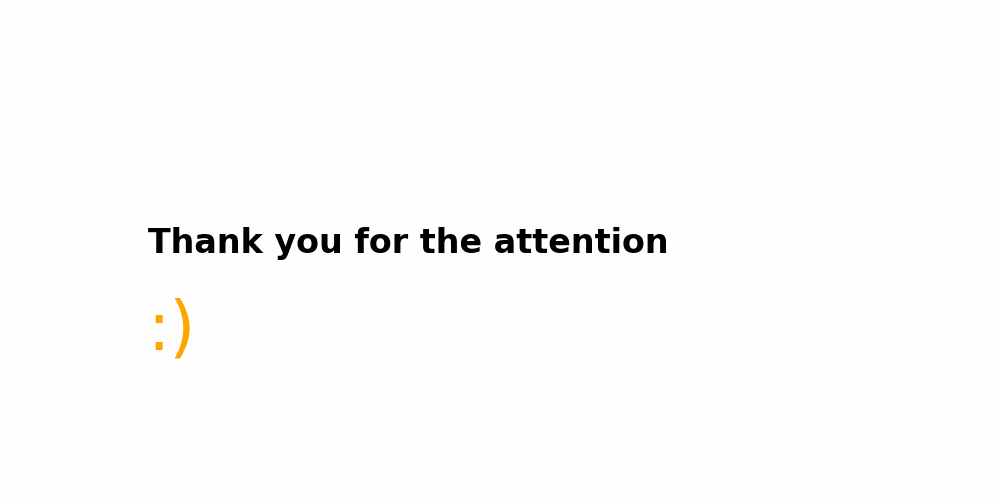

In [50]:
!pip install imageio

img = np.zeros((200, 400, 3), dtype=np.uint8)
img[:, :] = [255, 255, 255]

plt.figure(figsize=(10,5))
plt.imshow(img)
plt.text(10, 100, 'Thank you for the attention', fontsize=24, fontweight='bold', color='black')
plt.text(10, 150, ':)', fontsize=48, color='orange')
plt.axis('off')
plt.savefig('thankyou_attention.png')
plt.close()

images = []
image = imageio.imread('thankyou_attention.png')
images.append(image)
imageio.mimsave('thankyou_attention.gif', images, fps=0.5)

import IPython.display as display
display.Image(filename='thankyou_attention.gif')